In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("balanced_data.txt")
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,1293792,3,7,26,11607,20,0,8.67,10.26,...,20,0.00,0.00,0,0,0.00,0.00,0,0,DDoS
1,80,4421382,4,0,24,0,6,6,6.00,0.00,...,20,0.00,0.00,0,0,0.00,0.00,0,0,DDoS
2,80,1083538,3,6,26,11601,20,0,8.67,10.26,...,20,0.00,0.00,0,0,0.00,0.00,0,0,DDoS
3,80,80034360,8,4,56,11601,20,0,7.00,5.66,...,20,939.00,0.00,939,939,39300000.00,44200000.00,70600000,8072664,DDoS
4,80,642654,3,6,26,11607,20,0,8.67,10.26,...,20,0.00,0.00,0,0,0.00,0.00,0,0,DDoS


Dataset 'balanced_data.txt' loaded successfully!
Shape of the dataset: (1115290, 79)

--- 1. Initial Data Inspection ---

First 5 rows:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                80        1293792                  3                       7   
1                80        4421382                  4                       0   
2                80        1083538                  3                       6   
3                80       80034360                  8                       4   
4                80         642654                  3                       6   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           26                        11607   
1                           24                            0   
2                           26                        11601   
3                           56                        11601   
4                           26                        11607   

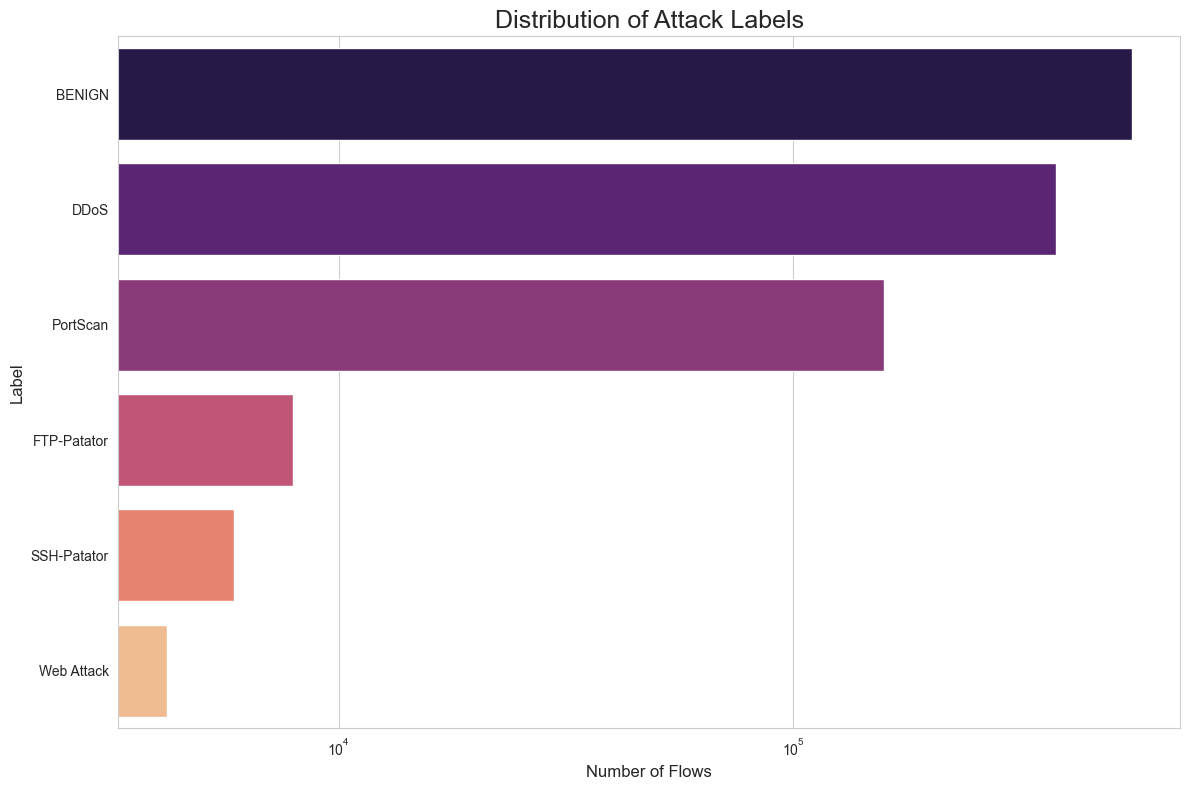


--- 4. Detailed Feature Analysis ---


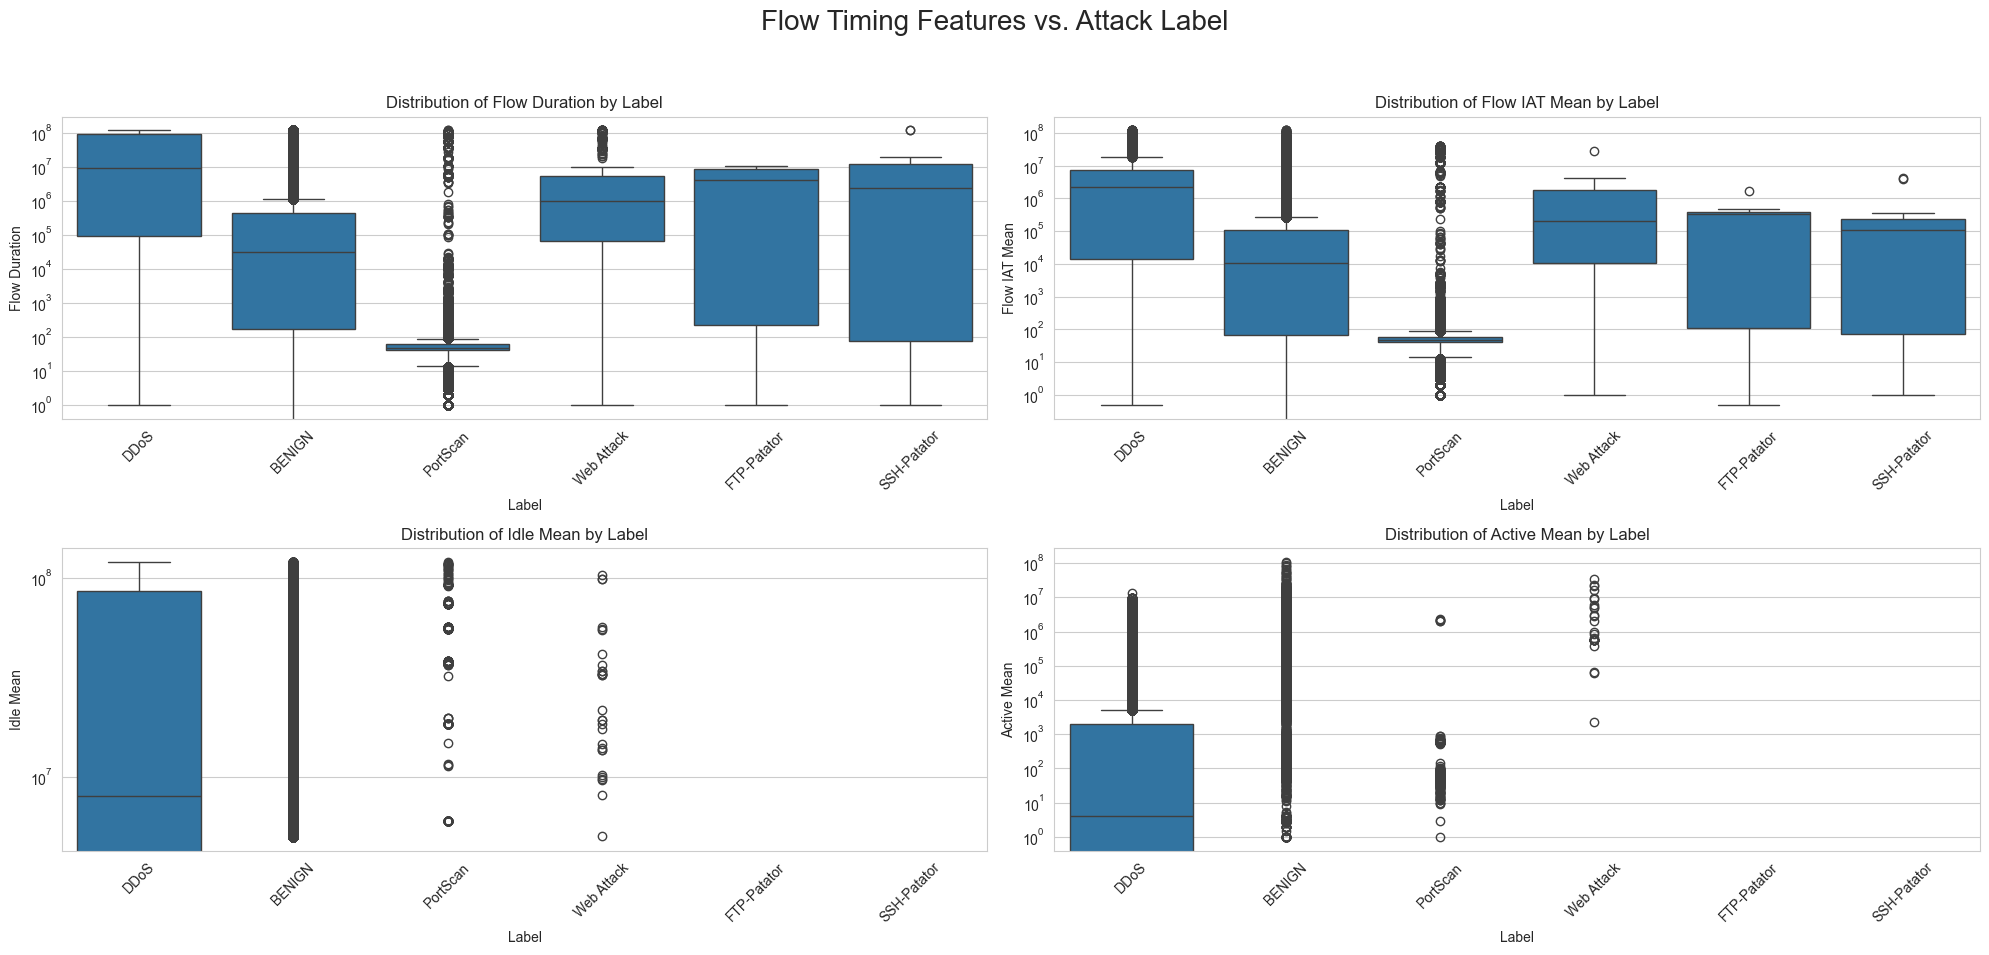

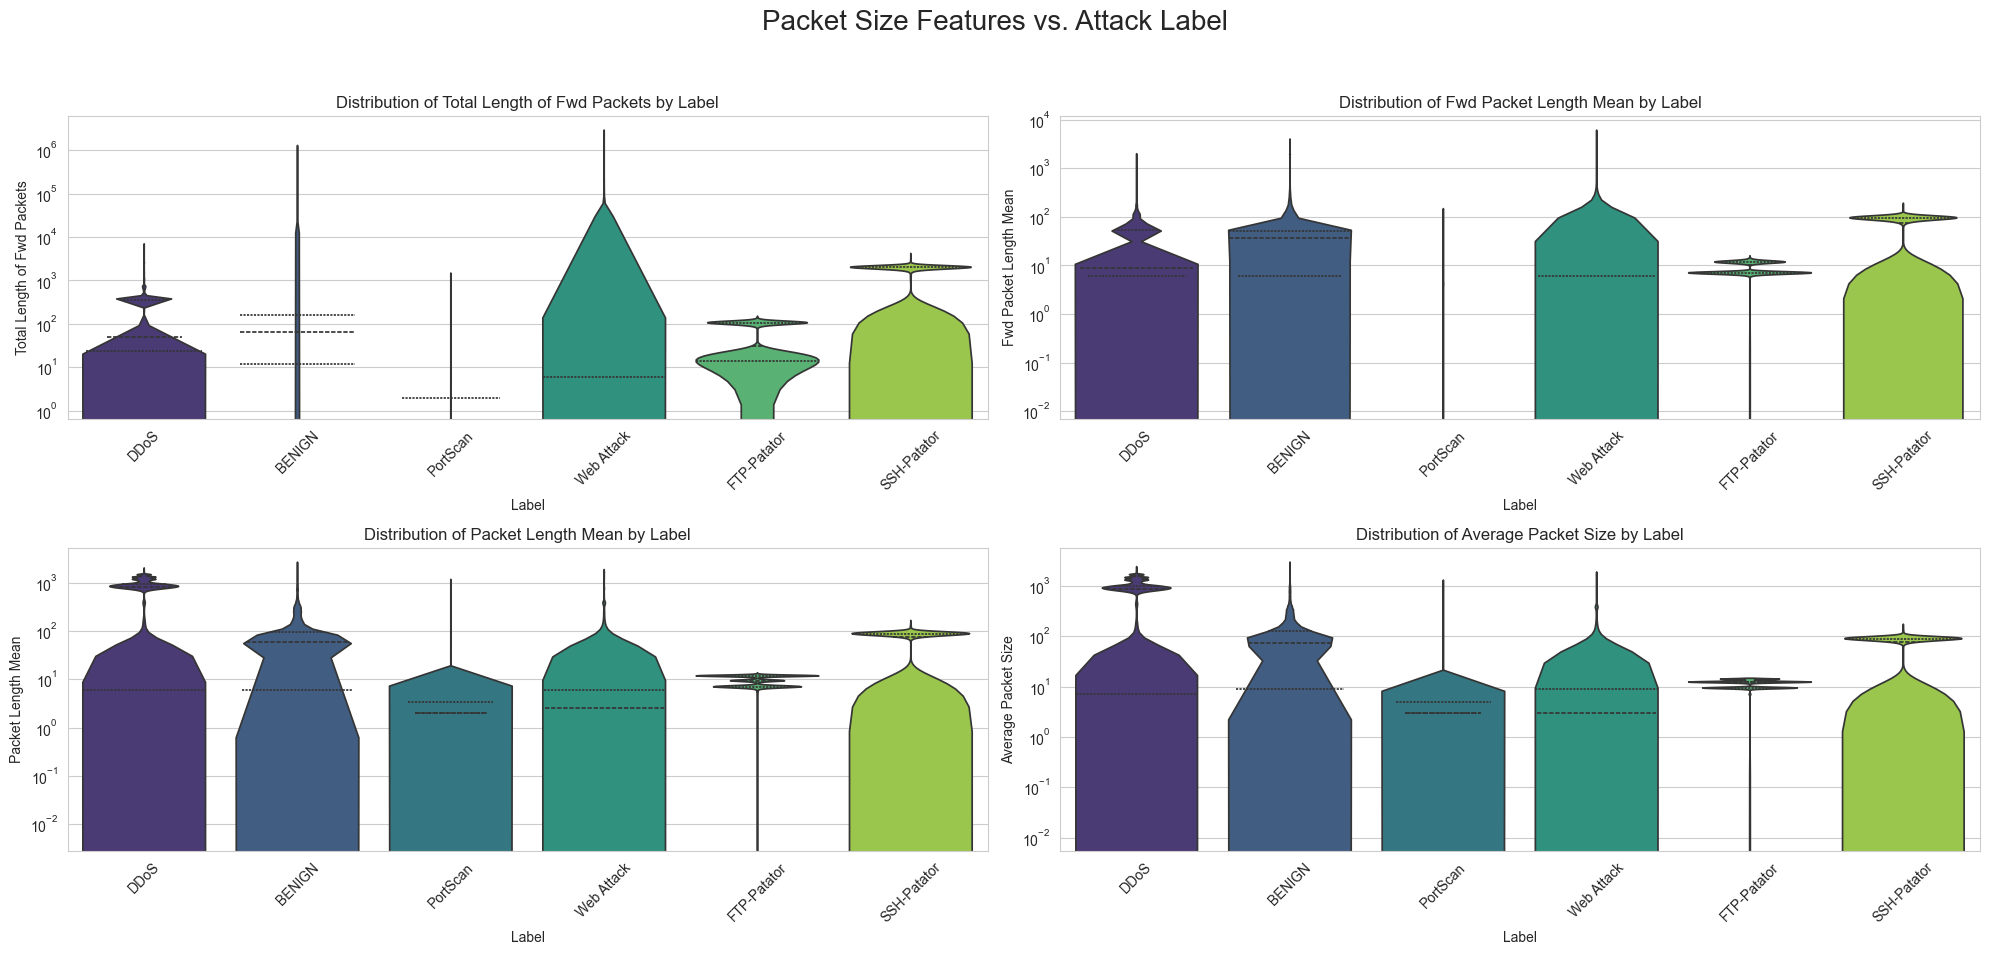

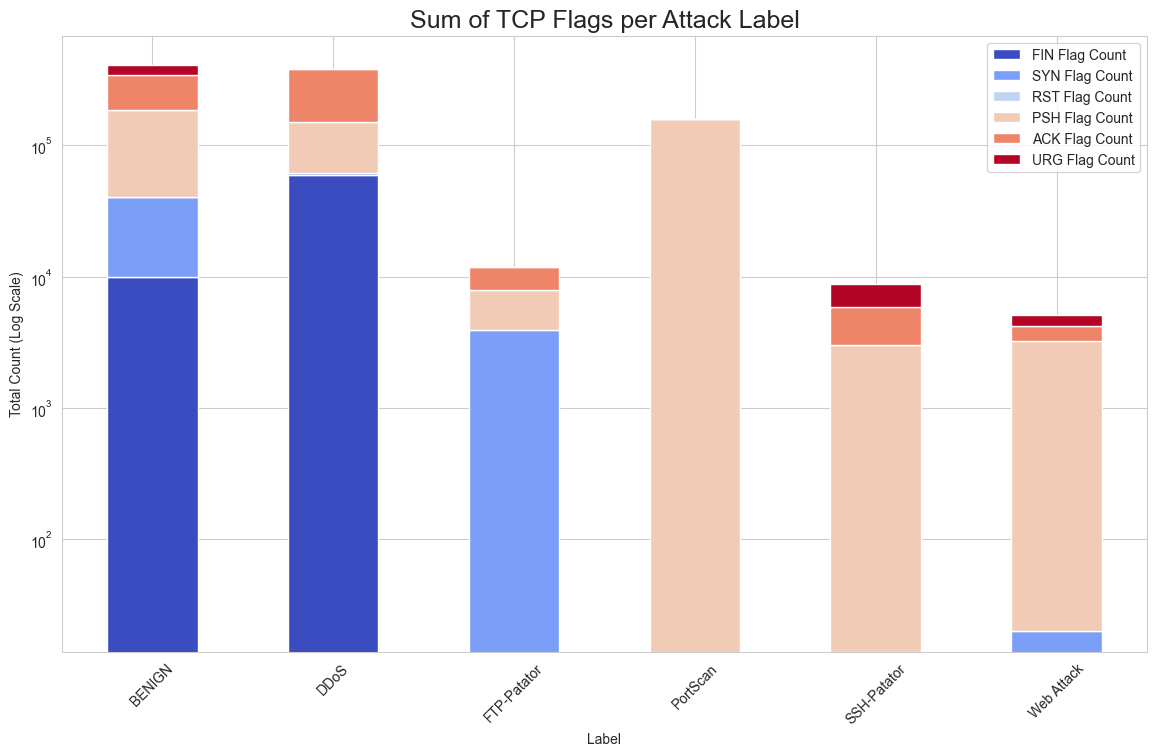


--- 5. Correlation Analysis ---

Features with correlation > 0.95 (potential for removal): ['Total Backward Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'SYN Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Idle Mean', 'Idle Max', 'Idle Min']


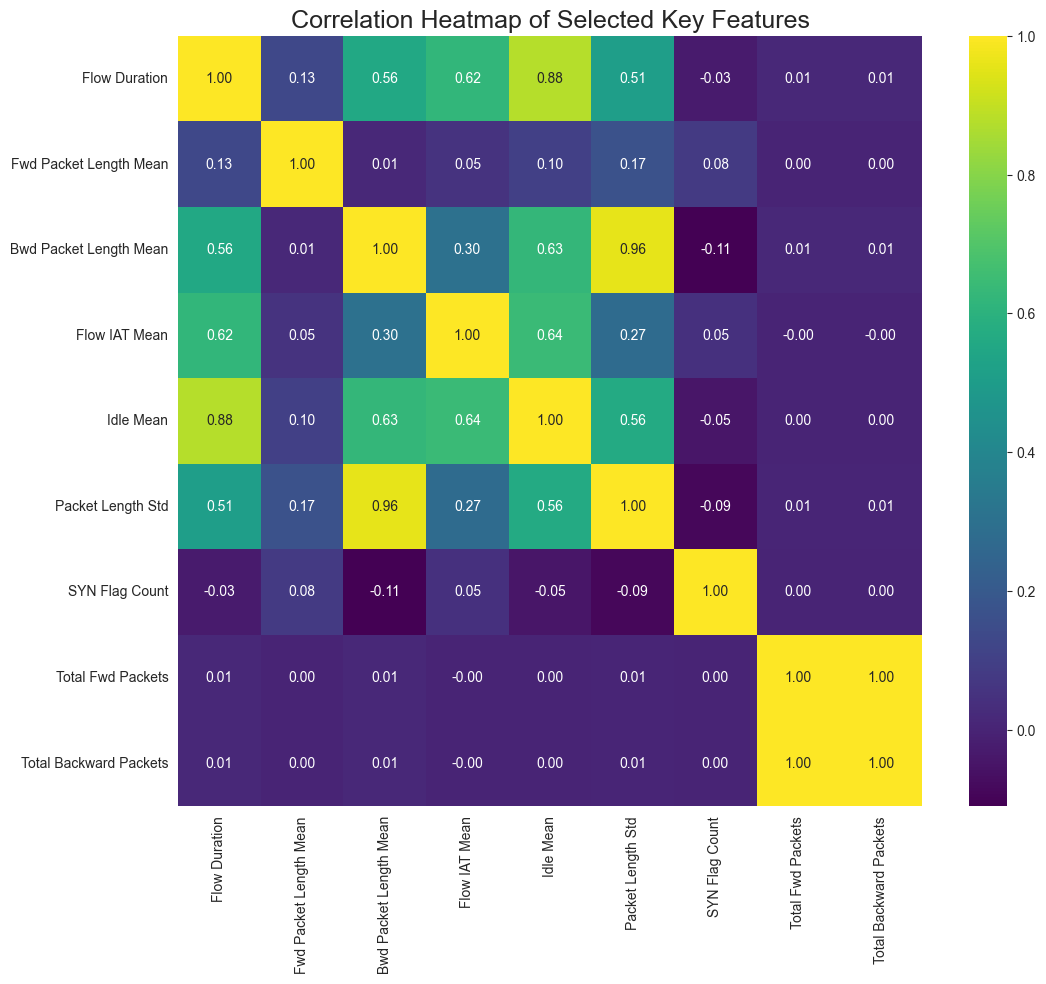


--- 6. EDA Conclusion & Feature Relevance ---

1.  **Data Integrity**: The dataset is complex and requires cleaning, especially
    handling of infinite values which are common in calculated rate features.

2.  **Class Imbalance**: The 'Label' column is highly imbalanced. This is typical
    of security datasets and requires strategies like oversampling (SMOTE) or
    using appropriate metrics (F1-score, Precision-Recall) for model evaluation.

3.  **Top Predictive Feature Groups**:
    * **Flow Timing**: Features like `Flow Duration`, `Idle Mean`, and `Flow IAT Mean`
      are powerful discriminators. Attacks like DDoS have vastly different timing
      profiles compared to benign traffic.
    * **Packet Size Statistics**: `Fwd Packet Length Mean`, `Packet Length Variance`,
      and `Average Packet Size` show distinct distributions for different attack
      types, making them highly relevant.
    * **TCP Flags**: `SYN Flag Count` and `FIN Flag Count` are critical for identifying
  

In [9]:
# -*- coding: utf-8 -*-
"""
Comprehensive and Detailed Exploratory Data Analysis (EDA) for a
Network Flow Cybersecurity Dataset (e.g., CIC-IDS2017).

This script is specifically tailored to the rich feature set generated by
network traffic analysis tools. It focuses on identifying the most relevant
features for distinguishing between benign and malicious network flows.
"""

# 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure visualization styles and settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


# 2. DATA LOADING AND INITIAL INSPECTION
# =============================================================================
# Load your dataset. Ensure the CSV file is in the same directory or provide the full path.
# This script assumes your file is named 'your_network_data.csv'.
FILE_PATH = 'balanced_data.txt'

try:
    df = pd.read_csv(FILE_PATH)
    print(f"Dataset '{FILE_PATH}' loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: '{FILE_PATH}' not found.")
    print("A dummy dataframe is being created to allow the script to run.")
    # Create a dummy dataframe with the specified columns if the file is not found
    columns = [
        'Destination Port','Flow Duration','Total Fwd Packets','Total Backward Packets',
        'Total Length of Fwd Packets','Total Length of Bwd Packets','Fwd Packet Length Max',
        'Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std',
        'Bwd Packet Length Max','Bwd Packet Length Min','Bwd Packet Length Mean',
        'Bwd Packet Length Std','Flow Bytes/s','Flow Packets/s','Flow IAT Mean',
        'Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Total','Fwd IAT Mean',
        'Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Total','Bwd IAT Mean',
        'Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags',
        'Fwd URG Flags','Bwd URG Flags','Fwd Header Length','Bwd Header Length',
        'Fwd Packets/s','Bwd Packets/s','Min Packet Length','Max Packet Length',
        'Packet Length Mean','Packet Length Std','Packet Length Variance','FIN Flag Count',
        'SYN Flag Count','RST Flag Count','PSH Flag Count','ACK Flag Count','URG Flag Count',
        'CWE Flag Count','ECE Flag Count','Down/Up Ratio','Average Packet Size',
        'Avg Fwd Segment Size','Avg Bwd Segment Size','Fwd Header Length.1',
        'Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate',
        'Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate',
        'Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets',
        'Subflow Bwd Bytes','Init_Win_bytes_forward','Init_Win_bytes_backward',
        'act_data_pkt_fwd','min_seg_size_forward','Active Mean','Active Std',
        'Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label'
    ]
    dummy_data = {col: np.random.rand(10) for col in columns}
    dummy_data['Label'] = ['BENIGN', 'DDoS', 'BENIGN', 'PortScan', 'BENIGN', 'DDoS', 'BENIGN', 'PortScan', 'BENIGN', 'BENIGN']
    df = pd.DataFrame(dummy_data)


print("\n--- 1. Initial Data Inspection ---")
print("\nFirst 5 rows:")
print(df.head())

print("\n\nData Types and Memory Usage:")
df.info(verbose=False)

# 3. DATA CLEANING AND PREPARATION
# =============================================================================
print("\n--- 2. Data Cleaning ---")
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head())

# Network flow datasets often have infinite values from division by zero
# (e.g., if Flow Duration is 0). Let's check and handle them.
print(f"\nNumber of infinite values: {np.isinf(df.select_dtypes(include=np.number)).values.sum()}")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True) # For simplicity in EDA, we drop rows with NaN.
                       # In a real project, you might choose to impute.
print("Infinite values replaced with NaN and rows dropped.")
print(f"New shape of the dataset: {df.shape}")

# Check for columns with only one unique value (zero variance)
zero_variance_cols = [col for col in df.columns if df[col].nunique() == 1]
if zero_variance_cols:
    print(f"\nColumns with zero variance (can be dropped): {zero_variance_cols}")
    df.drop(columns=zero_variance_cols, inplace=True)
else:
    print("\nNo columns with zero variance found.")


# 4. TARGET VARIABLE ANALYSIS (LABEL)
# =============================================================================
print("\n--- 3. Target Variable (Label) Analysis ---")
plt.figure(figsize=(12, 8))
label_counts = df['Label'].value_counts()
sns.barplot(y=label_counts.index, x=label_counts.values, orient='h', palette='magma')
plt.title('Distribution of Attack Labels', fontsize=18)
plt.xlabel('Number of Flows', fontsize=12)
plt.ylabel('Label', fontsize=12)
plt.xscale('log') # Use a log scale if the imbalance is very high
plt.tight_layout()
plt.show()
# Insight: This is the most important plot. It reveals the class distribution.
# A heavy imbalance (lots of 'BENIGN' traffic) is expected and must be handled
# during model training (e.g., with SMOTE or class weights).


# 5. DETAILED FEATURE ANALYSIS (GROUPED)
# =============================================================================
print("\n--- 4. Detailed Feature Analysis ---")

# We will analyze features by comparing their distributions across different labels.
# Due to the high number of features, we select a few key ones from each category.

# --- Group 1: Flow Timing Features ---
timing_features = ['Flow Duration', 'Flow IAT Mean', 'Idle Mean', 'Active Mean']
plt.figure(figsize=(20, 10))
plt.suptitle('Flow Timing Features vs. Attack Label', fontsize=20)
for i, feature in enumerate(timing_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Label', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Label')
    plt.xticks(rotation=45)
    plt.yscale('log') # Timing features often have extreme outliers
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Insight: DoS/DDoS attacks often have very short flow durations and low idle times.
# Benign traffic (like web browsing) will have longer idle times. This makes these
# features highly predictive.

# --- Group 2: Packet Size and Count Features ---
size_features = ['Total Length of Fwd Packets', 'Fwd Packet Length Mean', 'Packet Length Mean', 'Average Packet Size']
plt.figure(figsize=(20, 10))
plt.suptitle('Packet Size Features vs. Attack Label', fontsize=20)
for i, feature in enumerate(size_features):
    plt.subplot(2, 2, i+1)
    # Using violin plots to see the shape of the distribution
    sns.violinplot(x='Label', y=feature, data=df, inner='quartile', palette='viridis')
    plt.title(f'Distribution of {feature} by Label')
    plt.xticks(rotation=45)
    plt.yscale('log')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Insight: Port scanning attacks might use very small packets. Data exfiltration
# might use consistently large packets. These features help distinguish attack types.

# --- Group 3: TCP Flag Features ---
flag_features = ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count']
# Summing flags for each label to see patterns
flag_summary = df.groupby('Label')[flag_features].sum()
flag_summary = flag_summary.loc[~(flag_summary==0).all(axis=1)] # Remove rows with all zeros

if not flag_summary.empty:
    flag_summary.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
    plt.title('Sum of TCP Flags per Attack Label', fontsize=18)
    plt.ylabel('Total Count (Log Scale)')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.show()
# Insight: Flag counts are extremely important. For example, a SYN flood attack
# will have a massive number of SYN flags and very few others.


# 6. CORRELATION ANALYSIS
# =============================================================================
print("\n--- 5. Correlation Analysis ---")
# A full heatmap of 80+ features is unreadable. Instead, let's find the most
# highly correlated pairs to identify multicollinearity.
corr_matrix = df.select_dtypes(include=np.number).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f"\nFeatures with correlation > 0.95 (potential for removal): {to_drop}")

# Let's visualize a heatmap of a smaller subset of key features
key_features_corr = df[['Flow Duration', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
                        'Flow IAT Mean', 'Idle Mean', 'Packet Length Std', 'SYN Flag Count',
                        'Total Fwd Packets', 'Total Backward Packets']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(key_features_corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Selected Key Features', fontsize=18)
plt.show()
# Insight: Many features are derivatives of each other (e.g., 'Packet Length Mean' and
# 'Average Packet Size'), leading to high correlation. Removing one of each highly
# correlated pair can improve model performance and reduce complexity.


# 7. CONCLUSION AND KEY INSIGHTS
# =============================================================================
print("\n--- 6. EDA Conclusion & Feature Relevance ---")
print("""
1.  **Data Integrity**: The dataset is complex and requires cleaning, especially
    handling of infinite values which are common in calculated rate features.

2.  **Class Imbalance**: The 'Label' column is highly imbalanced. This is typical
    of security datasets and requires strategies like oversampling (SMOTE) or
    using appropriate metrics (F1-score, Precision-Recall) for model evaluation.

3.  **Top Predictive Feature Groups**:
    * **Flow Timing**: Features like `Flow Duration`, `Idle Mean`, and `Flow IAT Mean`
      are powerful discriminators. Attacks like DDoS have vastly different timing
      profiles compared to benign traffic.
    * **Packet Size Statistics**: `Fwd Packet Length Mean`, `Packet Length Variance`,
      and `Average Packet Size` show distinct distributions for different attack
      types, making them highly relevant.
    * **TCP Flags**: `SYN Flag Count` and `FIN Flag Count` are critical for identifying
      specific scan and flood attacks. Their presence or absence is a strong signal.
    * **Packet Counts**: `Total Fwd Packets` and `Total Backward Packets` can also
      be indicative, especially in asymmetric attacks like DoS.

4.  **Feature Redundancy**: There is significant multicollinearity. Many features are
    mathematically related (e.g., `Packet Length Mean`, `Avg Fwd Segment Size`,
    `Average Packet Size`). A feature selection process (e.g., using feature
    importance from a tree-based model) will be essential before final modeling.

5.  **Next Steps**:
    * **Preprocessing**: Create a robust pipeline to clean data, encode the 'Label'
      column, and scale numerical features.
    * **Feature Selection**: Use techniques like Recursive Feature Elimination (RFE) or
      model-based importance (e.g., from RandomForest) to select a smaller, more
      powerful set of features.
    * **Modeling**: Build and evaluate classification models, paying close attention
      to the class imbalance.
""")



Dataset 'balanced_data.txt' loaded successfully!
Shape of the dataset: (1115290, 79)

--- 1. Initial Data Inspection ---

First 5 rows:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                80        1293792                  3                       7   
1                80        4421382                  4                       0   
2                80        1083538                  3                       6   
3                80       80034360                  8                       4   
4                80         642654                  3                       6   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           26                        11607   
1                           24                            0   
2                           26                        11601   
3                           56                        11601   
4                           26                        11607   

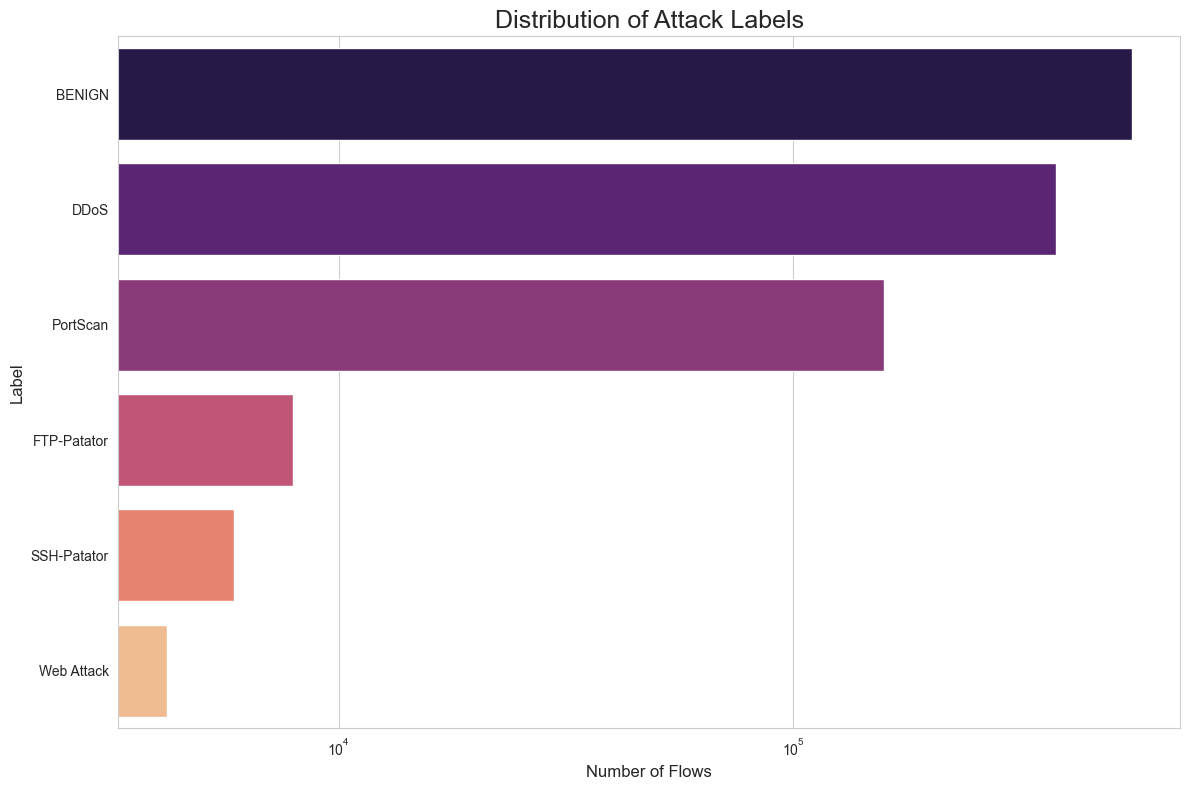


--- 4. Detailed Feature Analysis ---


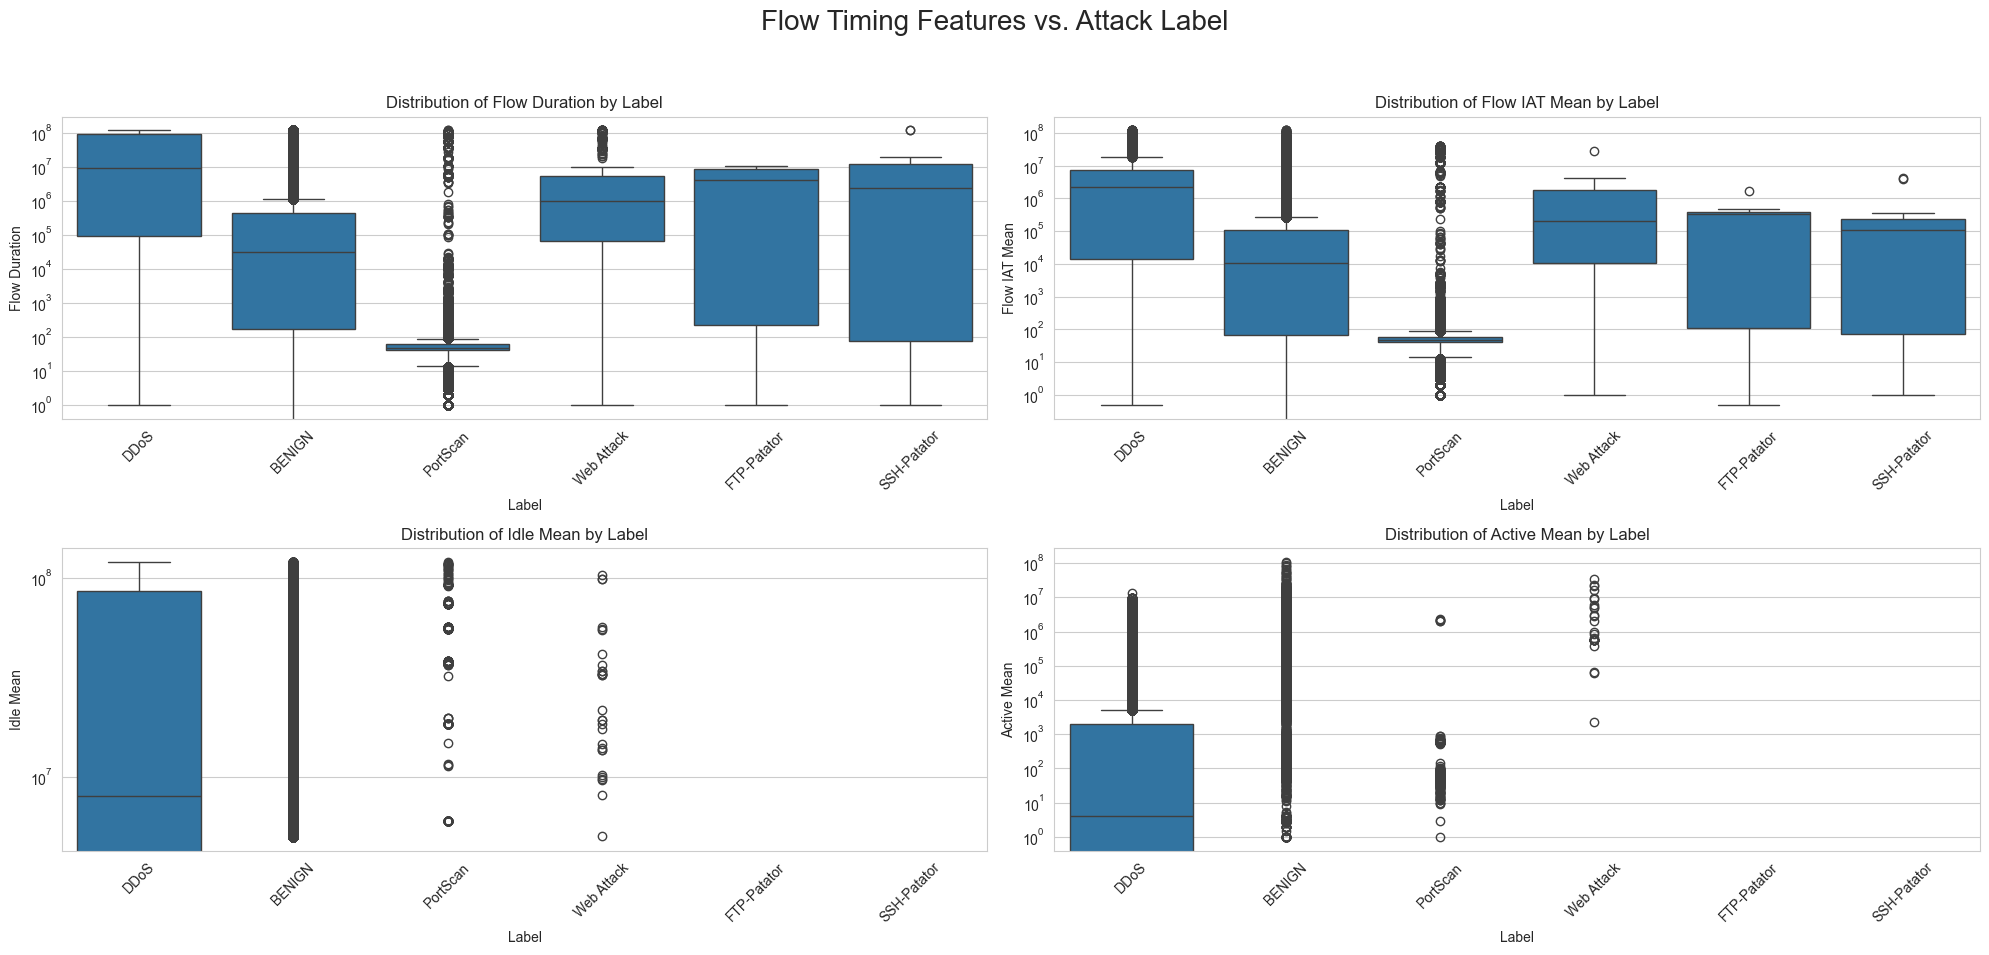

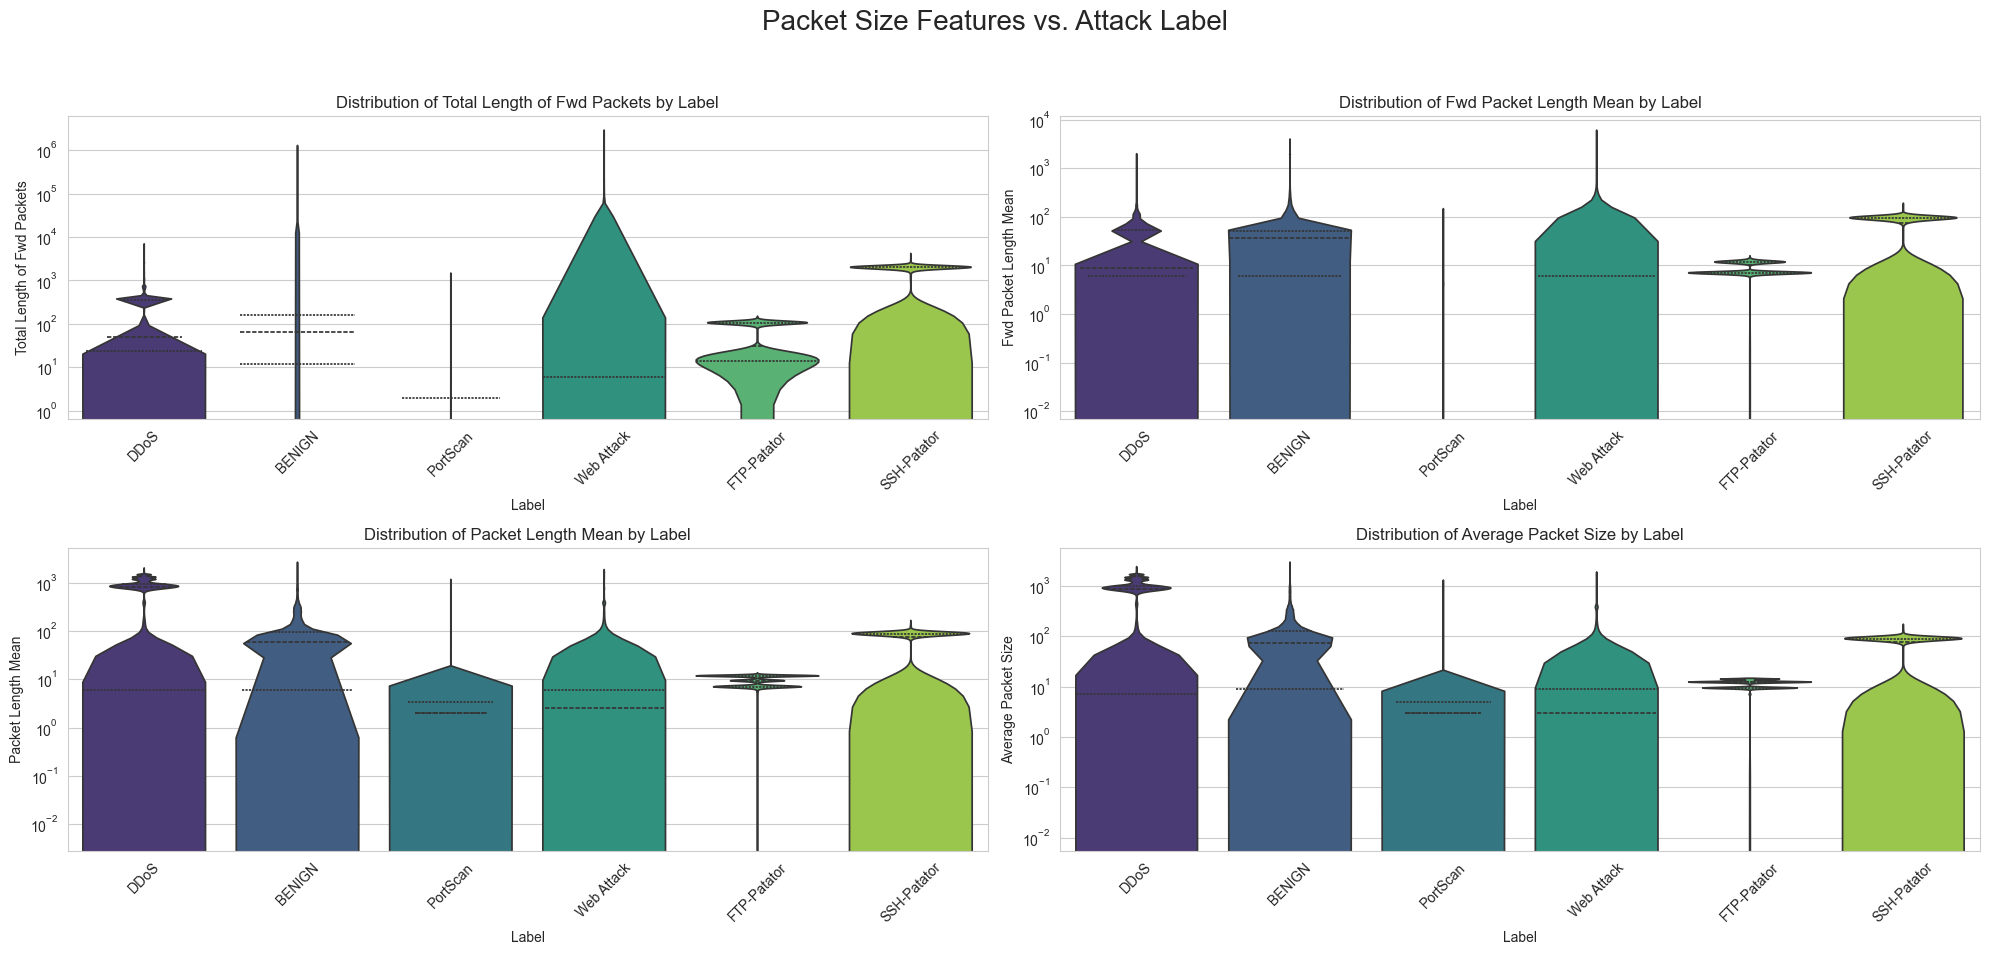

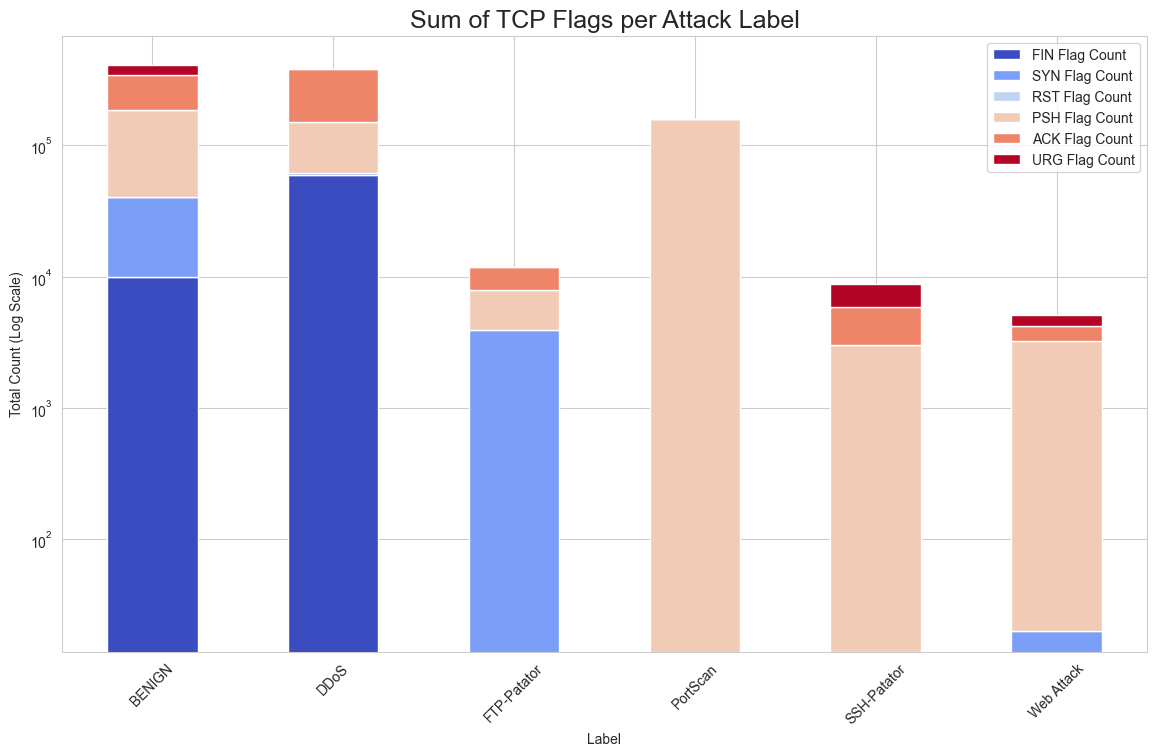


--- 5. Analysis of High-Importance Features from Paper ---


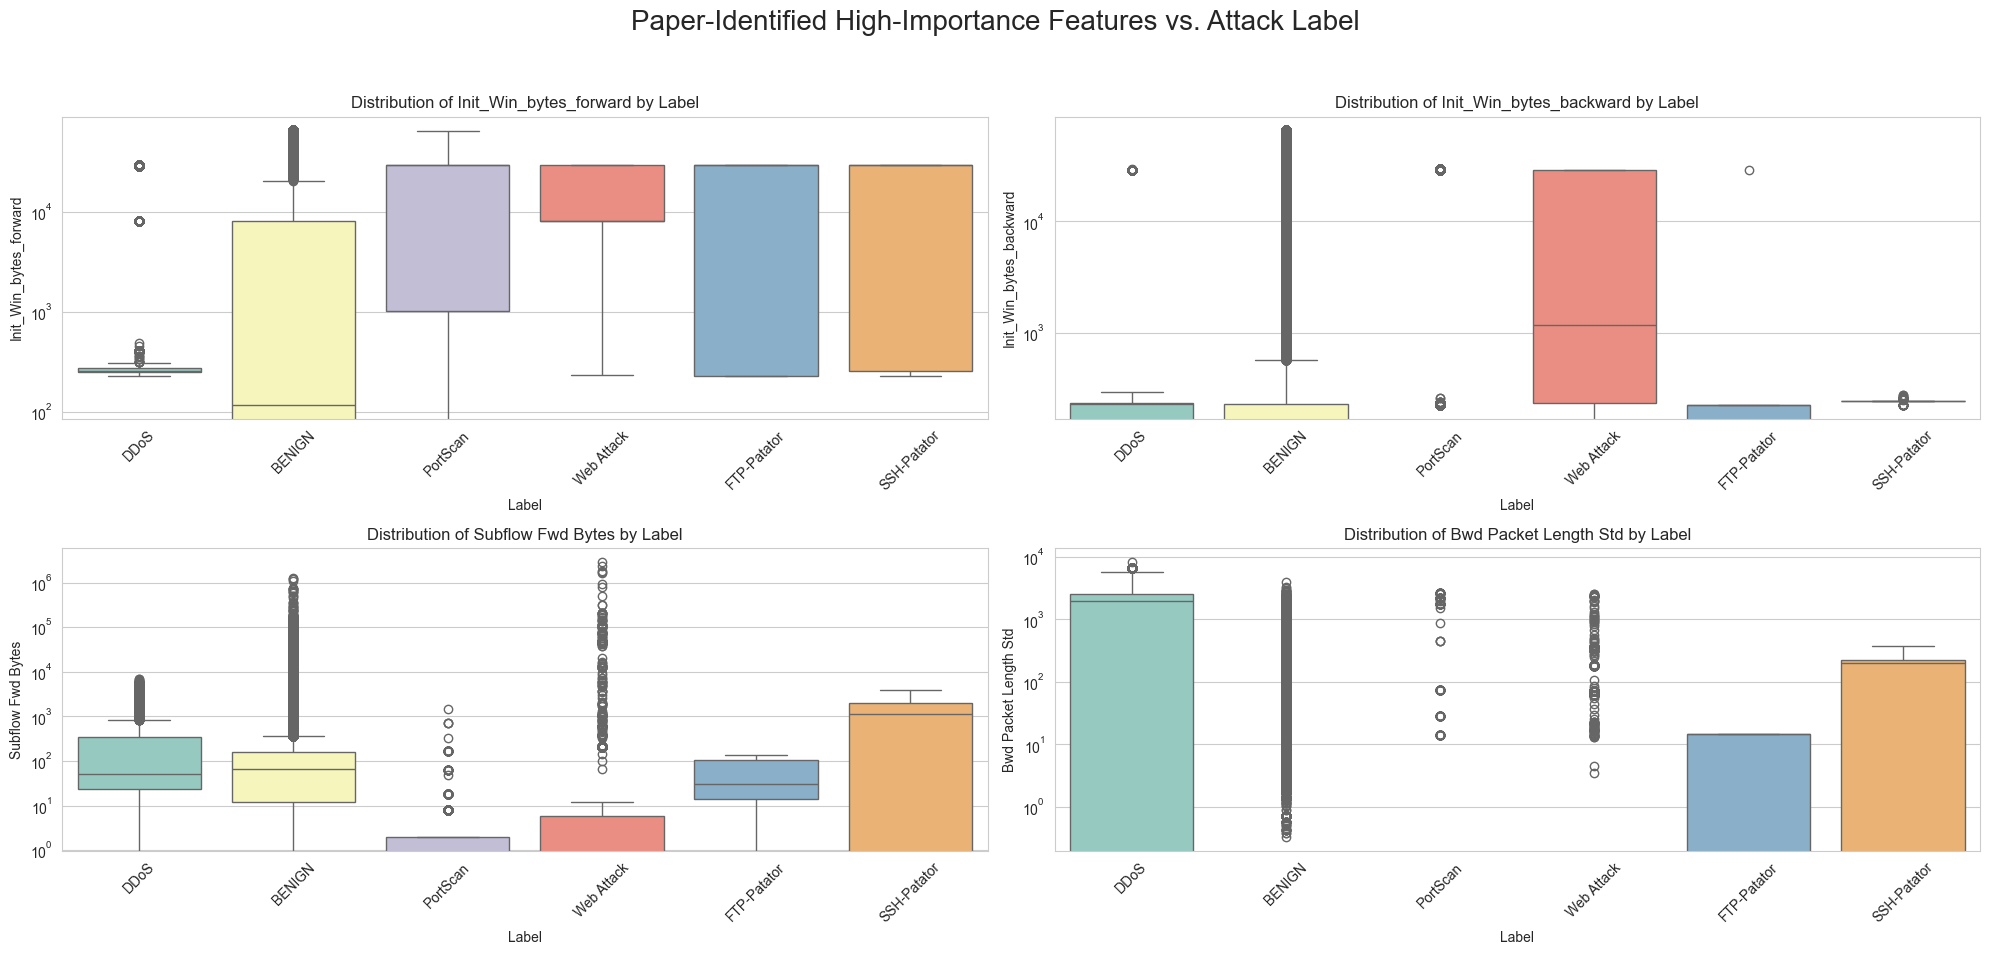


--- 6. Correlation Analysis ---

Features with correlation > 0.95 (potential for removal): ['Total Backward Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'SYN Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Idle Mean', 'Idle Max', 'Idle Min']


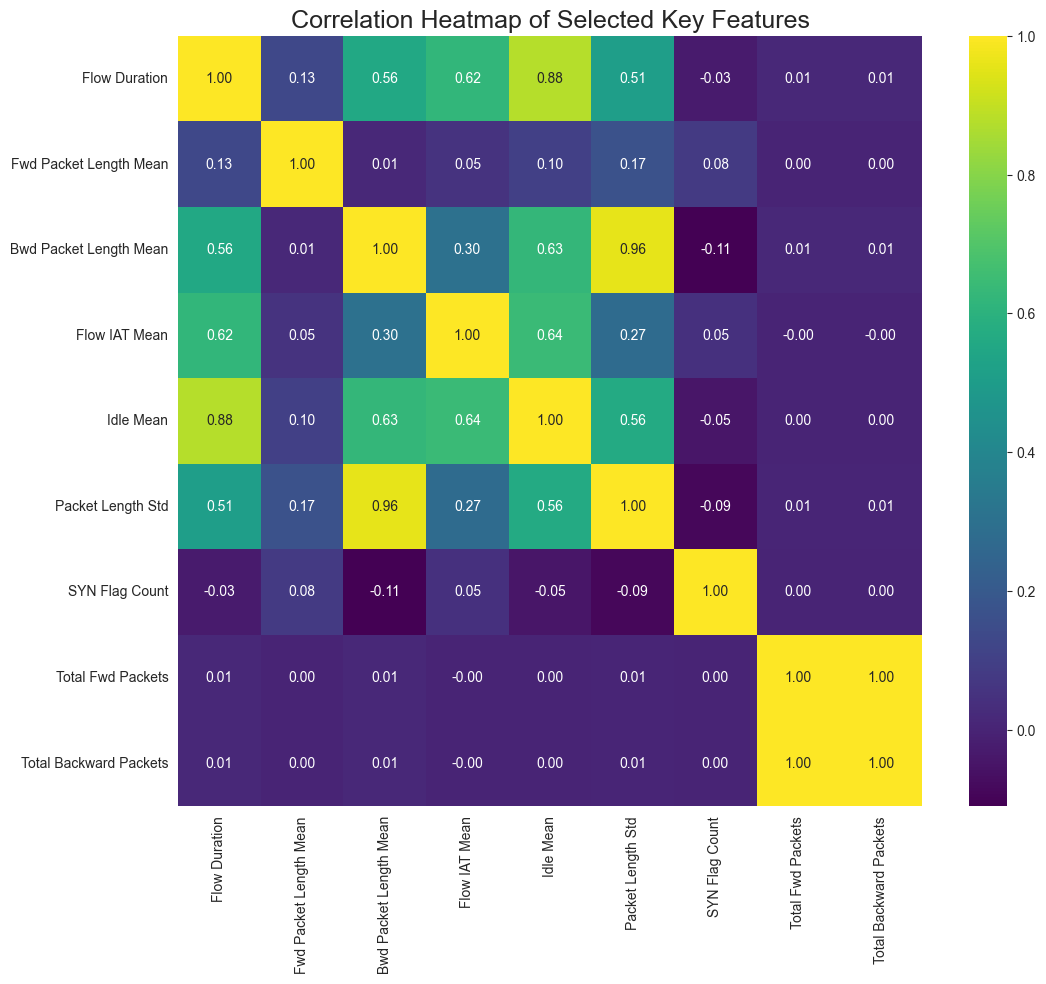


--- 7. EDA Conclusion & Feature Relevance ---

1.  **Data Integrity**: The dataset is complex and requires cleaning, especially
    handling of infinite values which are common in calculated rate features.

2.  **Class Imbalance**: The 'Label' column is highly imbalanced. This is typical
    of security datasets and requires strategies like oversampling (SMOTE) or
    using appropriate metrics (F1-score, Precision-Recall) for model evaluation.

3.  **Top Predictive Feature Groups (Confirmed by Research Paper)**:
    * **Flow Timing**: Features like `Flow Duration`, `Idle Mean`, and `Flow IAT Mean`
      are powerful discriminators. The paper confirms these are critical for DoS/DDoS detection.
    * **Packet Size Statistics**: `Fwd Packet Length Mean`, `Packet Length Variance`,
      and `Bwd Packet Length Std` show distinct distributions for different attack
      types, making them highly relevant for DoS, Heartbleed, and DDoS.
    * **TCP Flags**: `SYN Flag Count` and `PSH Flag Coun

In [ ]:
# -*- coding: utf-8 -*-
"""
Comprehensive and Detailed Exploratory Data Analysis (EDA) for a
Network Flow Cybersecurity Dataset (e.g., CIC-IDS2017).

This script is specifically tailored to the rich feature set generated by
network traffic analysis tools. It focuses on identifying the most relevant
features for distinguishing between benign and malicious network flows.

This analysis is enhanced with insights from the original research paper:
"Toward Generating a New Intrusion Detection Dataset and Intrusion
 Traffic Characterization" by Sharafaldin, Lashkari, and Ghorbani.
"""

# 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure visualization styles and settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


# 2. DATA LOADING AND INITIAL INSPECTION
# =============================================================================
# Load your dataset. Ensure the CSV file is in the same directory or provide the full path.
# This script assumes your file is named 'your_network_data.csv'.
FILE_PATH = 'balanced_data.txt'

try:
    df = pd.read_csv(FILE_PATH)
    print(f"Dataset '{FILE_PATH}' loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")
    df.drop(columns=['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
)
except FileNotFoundError:
    print(f"Error: '{FILE_PATH}' not found.")
    print("A dummy dataframe is being created to allow the script to run.")
    # Create a dummy dataframe with the specified columns if the file is not found
    columns = [
        'Destination Port','Flow Duration','Total Fwd Packets','Total Backward Packets',
        'Total Length of Fwd Packets','Total Length of Bwd Packets','Fwd Packet Length Max',
        'Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std',
        'Bwd Packet Length Max','Bwd Packet Length Min','Bwd Packet Length Mean',
        'Bwd Packet Length Std','Flow Bytes/s','Flow Packets/s','Flow IAT Mean',
        'Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Total','Fwd IAT Mean',
        'Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Total','Bwd IAT Mean',
        'Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags',
        'Fwd URG Flags','Bwd URG Flags','Fwd Header Length','Bwd Header Length',
        'Fwd Packets/s','Bwd Packets/s','Min Packet Length','Max Packet Length',
        'Packet Length Mean','Packet Length Std','Packet Length Variance','FIN Flag Count',
        'SYN Flag Count','RST Flag Count','PSH Flag Count','ACK Flag Count','URG Flag Count',
        'CWE Flag Count','ECE Flag Count','Down/Up Ratio','Average Packet Size',
        'Avg Fwd Segment Size','Avg Bwd Segment Size','Fwd Header Length.1',
        'Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate',
        'Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate',
        'Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets',
        'Subflow Bwd Bytes','Init_Win_bytes_forward','Init_Win_bytes_backward',
        'act_data_pkt_fwd','min_seg_size_forward','Active Mean','Active Std',
        'Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label'
    ]
    dummy_data = {col: np.random.rand(10) for col in columns}
    dummy_data['Label'] = ['BENIGN', 'DDoS', 'BENIGN', 'PortScan', 'BENIGN', 'DDoS', 'BENIGN', 'PortScan', 'BENIGN', 'BENIGN']
    df = pd.DataFrame(dummy_data)


print("\n--- 1. Initial Data Inspection ---")
print("\nFirst 5 rows:")
print(df.head())

print("\n\nData Types and Memory Usage:")
df.info(verbose=False)

# 3. DATA CLEANING AND PREPARATION
# =============================================================================
print("\n--- 2. Data Cleaning ---")
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head())

# Network flow datasets often have infinite values from division by zero
# (e.g., if Flow Duration is 0). Let's check and handle them.
print(f"\nNumber of infinite values: {np.isinf(df.select_dtypes(include=np.number)).values.sum()}")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True) # For simplicity in EDA, we drop rows with NaN.
                       # In a real project, you might choose to impute.
print("Infinite values replaced with NaN and rows dropped.")
print(f"New shape of the dataset: {df.shape}")

# Check for columns with only one unique value (zero variance)
zero_variance_cols = [col for col in df.columns if df[col].nunique() == 1]
if zero_variance_cols:
    print(f"\nColumns with zero variance (can be dropped): {zero_variance_cols}")
    df.drop(columns=zero_variance_cols, inplace=True)
else:
    print("\nNo columns with zero variance found.")


# 4. TARGET VARIABLE ANALYSIS (LABEL)
# =============================================================================
print("\n--- 3. Target Variable (Label) Analysis ---")
plt.figure(figsize=(12, 8))
label_counts = df['Label'].value_counts()
sns.barplot(y=label_counts.index, x=label_counts.values, orient='h', palette='magma')
plt.title('Distribution of Attack Labels', fontsize=18)
plt.xlabel('Number of Flows', fontsize=12)
plt.ylabel('Label', fontsize=12)
plt.xscale('log') # Use a log scale if the imbalance is very high
plt.tight_layout()
plt.show()
# Insight: This is the most important plot. It reveals the class distribution.
# A heavy imbalance (lots of 'BENIGN' traffic) is expected and must be handled
# during model training (e.g., with SMOTE or class weights).


# 5. DETAILED FEATURE ANALYSIS (GROUPED)
# =============================================================================
print("\n--- 4. Detailed Feature Analysis ---")

# We will analyze features by comparing their distributions across different labels.
# Due to the high number of features, we select a few key ones from each category.

# --- Group 1: Flow Timing Features ---
timing_features = ['Flow Duration', 'Flow IAT Mean', 'Idle Mean', 'Active Mean']
plt.figure(figsize=(20, 10))
plt.suptitle('Flow Timing Features vs. Attack Label', fontsize=20)
for i, feature in enumerate(timing_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Label', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Label')
    plt.xticks(rotation=45)
    plt.yscale('log') # Timing features often have extreme outliers
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Insight: DoS/DDoS attacks often have very short flow durations and low idle times.
# Benign traffic (like web browsing) will have longer idle times. The original
# research paper confirms these are highly predictive for DoS attacks.

# --- Group 2: Packet Size and Count Features ---
size_features = ['Total Length of Fwd Packets', 'Fwd Packet Length Mean', 'Packet Length Mean', 'Average Packet Size']
plt.figure(figsize=(20, 10))
plt.suptitle('Packet Size Features vs. Attack Label', fontsize=20)
for i, feature in enumerate(size_features):
    plt.subplot(2, 2, i+1)
    # Using violin plots to see the shape of the distribution
    sns.violinplot(x='Label', y=feature, data=df, inner='quartile', palette='viridis')
    plt.title(f'Distribution of {feature} by Label')
    plt.xticks(rotation=45)
    plt.yscale('log')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Insight: Port scanning attacks might use very small packets. Data exfiltration
# might use consistently large packets. These features help distinguish attack types.

# --- Group 3: TCP Flag Features ---
flag_features = ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count']
# Summing flags for each label to see patterns
flag_summary = df.groupby('Label')[flag_features].sum()
flag_summary = flag_summary.loc[~(flag_summary==0).all(axis=1)] # Remove rows with all zeros

if not flag_summary.empty:
    flag_summary.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
    plt.title('Sum of TCP Flags per Attack Label', fontsize=18)
    plt.ylabel('Total Count (Log Scale)')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.show()
# Insight: Flag counts are extremely important. The paper highlights SYN, ACK, and PSH
# flags as key for detecting Brute Force attacks. SYN floods would show a massive spike here.


# 6. ANALYSIS OF HIGH-IMPORTANCE FEATURES (BASED ON RESEARCH PAPER)
# =============================================================================
print("\n--- 5. Analysis of High-Importance Features from Paper ---")
# The paper (Table 3) identifies specific features as being highly predictive for
# certain attacks. Let's visualize some of them.

paper_features = ['Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Subflow Fwd Bytes', 'Bwd Packet Length Std']
plt.figure(figsize=(20, 10))
plt.suptitle('Paper-Identified High-Importance Features vs. Attack Label', fontsize=20)
for i, feature in enumerate(paper_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Label', y=feature, data=df, palette='Set3')
    plt.title(f'Distribution of {feature} by Label')
    plt.xticks(rotation=45)
    plt.yscale('log')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Insight: The paper identifies 'Init_Win_bytes_forward' as crucial for detecting
# Brute Force (SSH/FTP) and Web Attacks. 'Bwd Packet Length Std' is highlighted
# for DoS, Heartbleed, and DDoS. These plots allow us to visually confirm these findings.


# 7. CORRELATION ANALYSIS
# =============================================================================
print("\n--- 6. Correlation Analysis ---")
# A full heatmap of 80+ features is unreadable. Instead, let's find the most
# highly correlated pairs to identify multicollinearity.
corr_matrix = df.select_dtypes(include=np.number).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f"\nFeatures with correlation > 0.95 (potential for removal): {to_drop}")

# Let's visualize a heatmap of a smaller subset of key features
key_features_corr = df[['Flow Duration', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
                        'Flow IAT Mean', 'Idle Mean', 'Packet Length Std', 'SYN Flag Count',
                        'Total Fwd Packets', 'Total Backward Packets']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(key_features_corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Selected Key Features', fontsize=18)
plt.show()
# Insight: Many features are derivatives of each other (e.g., 'Packet Length Mean' and
# 'Average Packet Size'), leading to high correlation. Removing one of each highly
# correlated pair can improve model performance and reduce complexity.


# 8. CONCLUSION AND KEY INSIGHTS
# =============================================================================
print("\n--- 7. EDA Conclusion & Feature Relevance ---")
print("""
1.  **Data Integrity**: The dataset is complex and requires cleaning, especially
    handling of infinite values which are common in calculated rate features.

2.  **Class Imbalance**: The 'Label' column is highly imbalanced. This is typical
    of security datasets and requires strategies like oversampling (SMOTE) or
    using appropriate metrics (F1-score, Precision-Recall) for model evaluation.

3.  **Top Predictive Feature Groups (Confirmed by Research Paper)**:
    * **Flow Timing**: Features like `Flow Duration`, `Idle Mean`, and `Flow IAT Mean`
      are powerful discriminators. The paper confirms these are critical for DoS/DDoS detection.
    * **Packet Size Statistics**: `Fwd Packet Length Mean`, `Packet Length Variance`,
      and `Bwd Packet Length Std` show distinct distributions for different attack
      types, making them highly relevant for DoS, Heartbleed, and DDoS.
    * **TCP Flags**: `SYN Flag Count` and `PSH Flag Count` are critical for identifying
      specific scan and Brute Force attacks.
    * **Window Sizes**: `Init_Win_bytes_forward` and `Init_Win_bytes_backward` are
      highlighted by the paper as excellent predictors for Brute Force and Web Attacks.

4.  **Feature Redundancy**: There is significant multicollinearity. Many features are
    mathematically related (e.g., `Packet Length Mean`, `Avg Fwd Segment Size`).
    A feature selection process will be essential before final modeling.

5.  **Next Steps**:
    * **Preprocessing**: Create a robust pipeline to clean data, encode the 'Label'
      column, and scale numerical features.
    * **Feature Selection**: Use the insights from this EDA and the paper to guide
      feature selection. Start with the high-importance features identified.
    * **Modeling**: Build and evaluate classification models, paying close attention
      to the class imbalance.
""")


Dataset 'balanced_data.txt' loaded successfully!
Original shape: (1115290, 79)
Shape after cleaning infinities/NaNs: (1113754, 79)
Shape after feature selection: (1113754, 26)

Using 25 features for the model.

Training set size: 891003 samples
Test set size: 222751 samples

Handling class imbalance with SMOTE...
SMOTE applied. Training set is now balanced.
New training set size: 2674548 samples

--- Training the Detection Model ---
Model training complete.

--- Evaluating Model Performance on the Test Set ---

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    111440
        DDoS       1.00      1.00      1.00     75947
 FTP-Patator       1.00      1.00      1.00      1587
    PortScan       1.00      1.00      1.00     31761
 SSH-Patator       1.00      1.00      1.00      1179
  Web Attack       0.84      0.98      0.90       837

    accuracy                           1.00    222751
   macro avg       0.97   

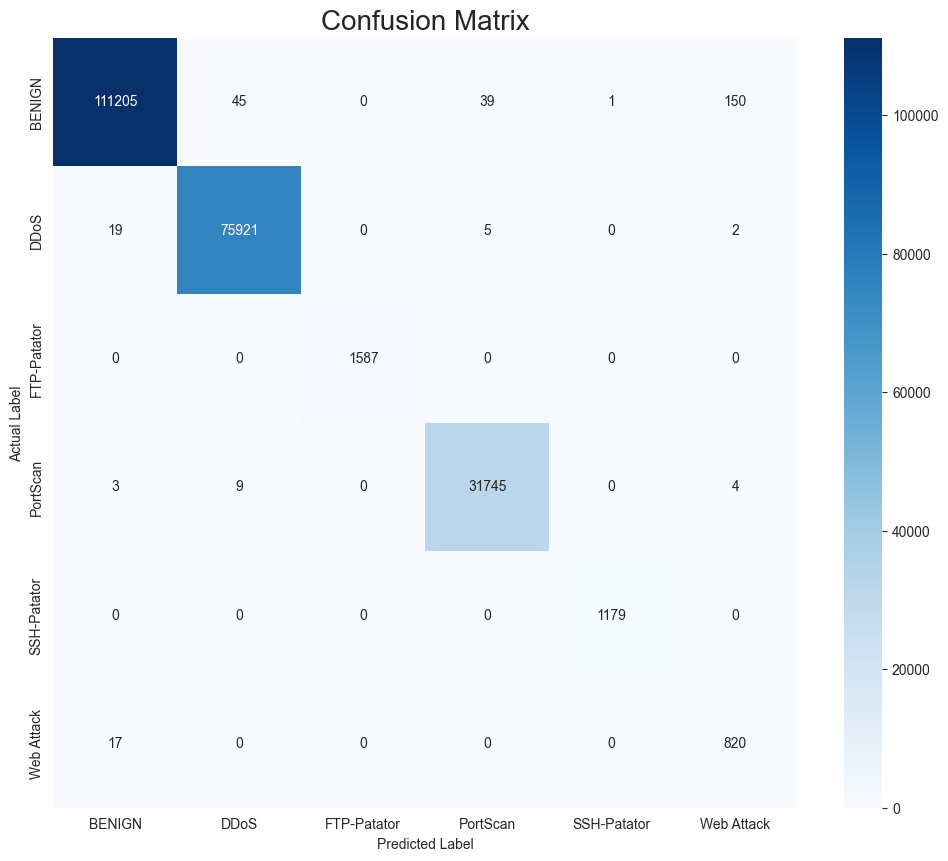


--- Feature Importance Analysis ---
Top 10 most important features:
                        Feature  Importance
0              Destination Port        0.19
16      Init_Win_bytes_backward        0.14
2             Total Fwd Packets        0.08
17            Packet Length Std        0.08
18       Packet Length Variance        0.07
10       Fwd Packet Length Mean        0.06
11       Bwd Packet Length Mean        0.06
15       Init_Win_bytes_forward        0.06
4   Total Length of Fwd Packets        0.06
5   Total Length of Bwd Packets        0.05


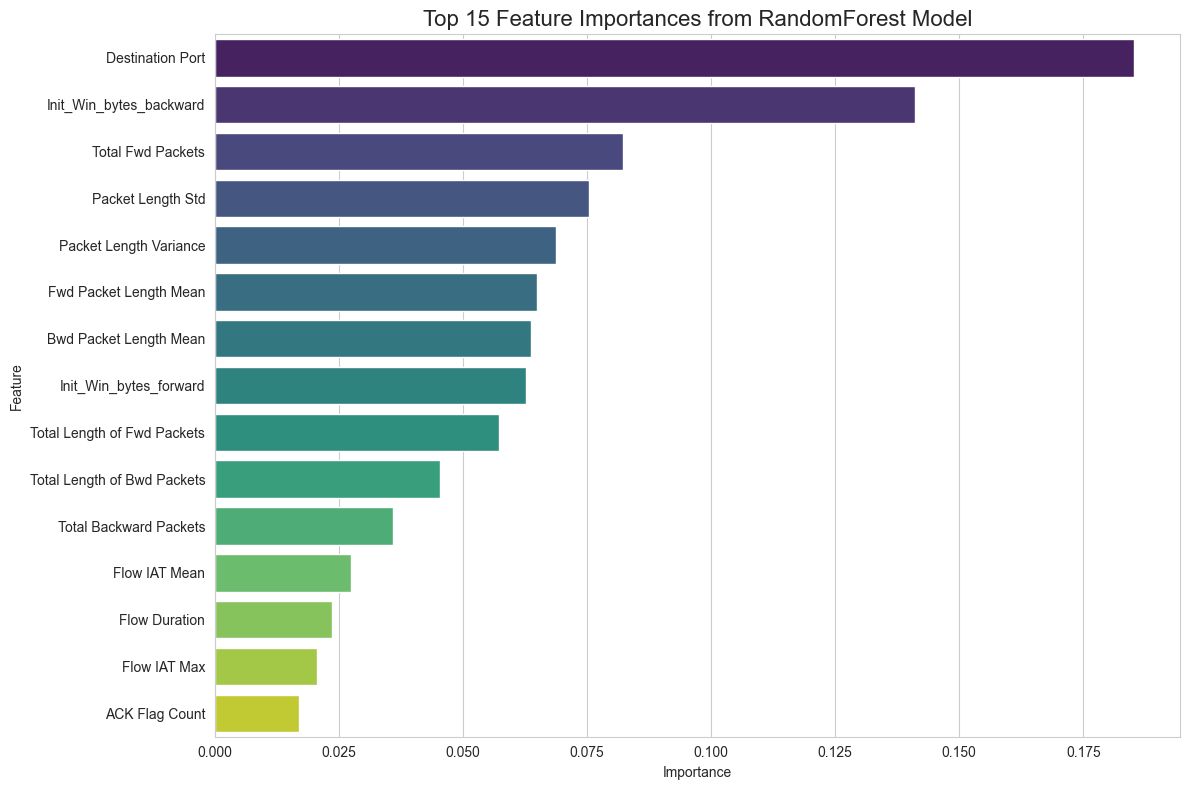

In [12]:
# -*- coding: utf-8 -*-
"""
End-to-End Cybersecurity Detection Pipeline.

This script implements a complete machine learning pipeline to train and
evaluate a network intrusion detection model. It uses the insights gained
from our detailed EDA to perform feature selection, data preprocessing,
and model training.
"""

# 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Configure settings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


# 2. FEATURE SELECTION (Based on EDA and Practicality Analysis)
# =============================================================================
# Here we define the final list of features to be used for the model.
# This includes all Tier 1, 2, and 3 features identified as relevant.
selected_features = [
    # Tier 1: Essential & Low-Cost
    'Destination Port', 'Flow Duration', 'Total Fwd Packets',
    'Total Backward Packets', 'Total Length of Fwd Packets',
    'Total Length of Bwd Packets', 'FIN Flag Count', 'SYN Flag Count',
    'RST Flag Count', 'ACK Flag Count',

    # Tier 2: High-Value & Moderately-Costly
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Flow IAT Mean',
    'Flow IAT Min', 'Flow IAT Max', 'Init_Win_bytes_forward',
    'Init_Win_bytes_backward',

    # Tier 3: Advanced & Higher-Cost
    'Packet Length Std', 'Packet Length Variance', 'Idle Mean', 'Idle Max',
    'Idle Min', 'Active Mean', 'Active Max', 'Active Min'
]


# 3. DATA LOADING AND PREPROCESSING
# =============================================================================
# Load your dataset.
FILE_PATH = 'balanced_data.txt'
try:
    df = pd.read_csv(FILE_PATH)
    print(f"Dataset '{FILE_PATH}' loaded successfully!")
except FileNotFoundError:
    print(f"Error: '{FILE_PATH}' not found. Using a dummy dataframe.")
    # Fallback dummy data
    columns = selected_features + ['Label']
    dummy_data = {col: np.random.rand(100) for col in columns}
    dummy_data['Label'] = np.random.choice(['BENIGN', 'DDoS', 'PortScan'], 100)
    df = pd.DataFrame(dummy_data)

print(f"Original shape: {df.shape}")

# --- Data Cleaning ---
# Replace infinite values and drop rows with any NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(f"Shape after cleaning infinities/NaNs: {df.shape}")

# --- Feature Engineering & Selection ---
# Ensure only the selected features and the label are kept
# Check which of the selected features are actually in the dataframe
available_features = [feature for feature in selected_features if feature in df.columns]
df = df[available_features + ['Label']]
print(f"Shape after feature selection: {df.shape}")
print(f"\nUsing {len(available_features)} features for the model.")

# --- Define Features (X) and Target (y) ---
X = df.drop('Label', axis=1)
y = df['Label']

# --- Encode the Target Variable ---
# Convert string labels (e.g., 'BENIGN', 'DDoS') into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Split Data into Training and Testing Sets ---
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# --- Scale Numerical Features ---
# Use StandardScaler to normalize features to have mean=0 and std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Handle Class Imbalance using SMOTE ---
# SMOTE creates synthetic samples for the minority classes.
# IMPORTANT: Apply SMOTE only to the training data.
print("\nHandling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print("SMOTE applied. Training set is now balanced.")
print(f"New training set size: {X_train_resampled.shape[0]} samples")


# 4. MODEL TRAINING
# =============================================================================
print("\n--- Training the Detection Model ---")
# We use a RandomForestClassifier, a powerful and robust model.
# n_estimators=100 means it will build 100 decision trees.
# n_jobs=-1 uses all available CPU cores for faster training.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")


# 5. MODEL EVALUATION
# =============================================================================
print("\n--- Evaluating Model Performance on the Test Set ---")
# Make predictions on the original, unbalanced test set
y_pred = model.predict(X_test_scaled)

# --- Classification Report ---
# This report shows the main classification metrics for each class.
# Precision: Ability of the classifier not to label as positive a sample that is negative.
# Recall: Ability of the classifier to find all the positive samples.
# F1-score: A weighted average of the precision and recall.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --- Accuracy Score ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# --- Confusion Matrix ---
# This shows where the model made mistakes.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix', fontsize=20)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# 6. FEATURE IMPORTANCE
# =============================================================================
print("\n--- Feature Importance Analysis ---")
# Let's see which features the trained model found most important.
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from RandomForest Model', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Dataset 'balanced_data.txt' loaded successfully!
Original shape: (1115290, 79)
Shape after cleaning infinities/NaNs: (1113754, 79)
Shape after feature selection: (1113754, 26)

Using 25 features for the model.

Training set size: 891003 samples
Test set size: 222751 samples

--- Training the Detection Model (Baseline without SMOTE) ---
Model training complete.

--- Evaluating Model Performance on the Test Set ---

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    111440
        DDoS       1.00      1.00      1.00     75947
 FTP-Patator       1.00      1.00      1.00      1587
    PortScan       1.00      1.00      1.00     31761
 SSH-Patator       1.00      1.00      1.00      1179
  Web Attack       0.93      0.93      0.93       837

    accuracy                           1.00    222751
   macro avg       0.99      0.99      0.99    222751
weighted avg       1.00      1.00      1.00    222751

Overall Accuracy

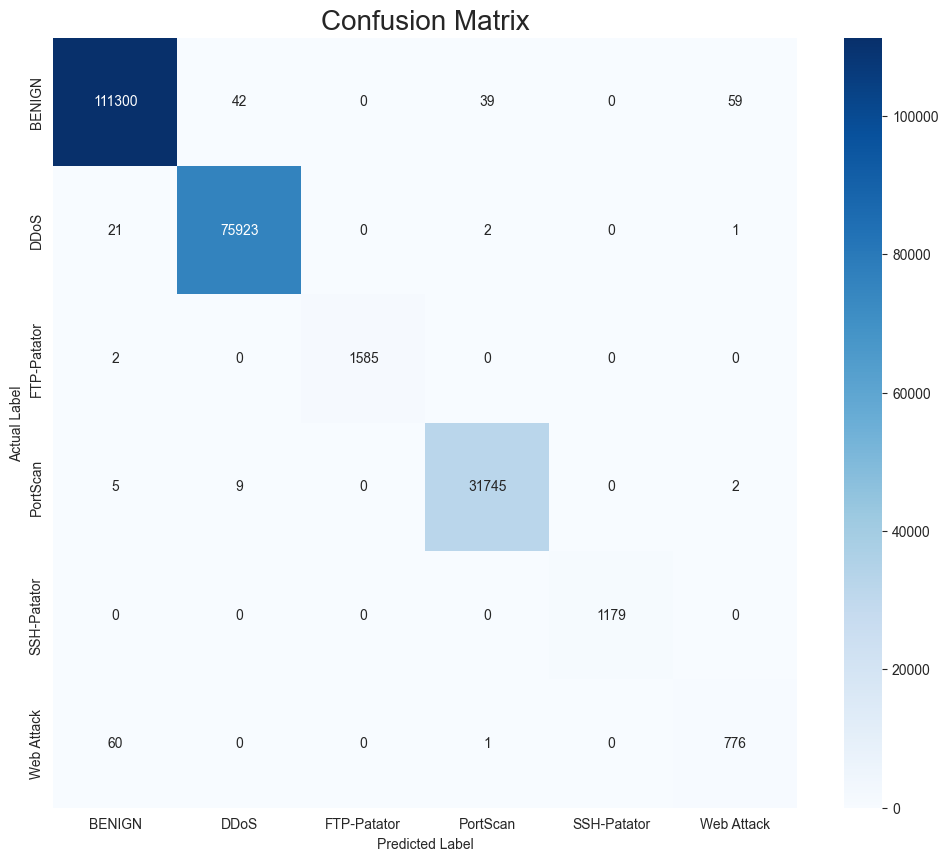


--- Feature Importance Analysis ---
Top 10 most important features:
                        Feature  Importance
18       Packet Length Variance        0.16
17            Packet Length Std        0.10
0              Destination Port        0.10
15       Init_Win_bytes_forward        0.09
11       Bwd Packet Length Mean        0.08
4   Total Length of Fwd Packets        0.08
5   Total Length of Bwd Packets        0.07
2             Total Fwd Packets        0.06
10       Fwd Packet Length Mean        0.05
9                ACK Flag Count        0.03


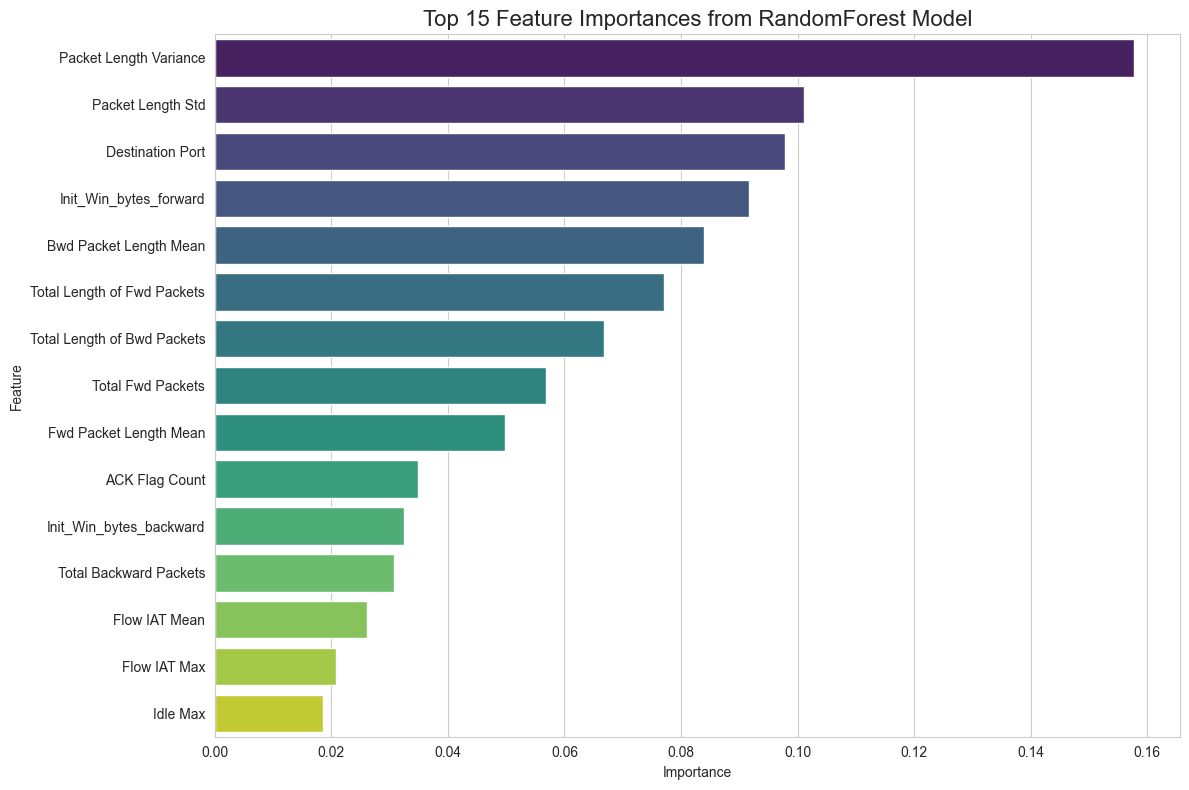

In [13]:
# -*- coding: utf-8 -*-
"""
End-to-End Cybersecurity Detection Pipeline (Baseline without SMOTE).
"""

# 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configure settings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


# 2. FEATURE SELECTION (Based on EDA and Practicality Analysis)
# =============================================================================
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets',
    'Total Backward Packets', 'Total Length of Fwd Packets',
    'Total Length of Bwd Packets', 'FIN Flag Count', 'SYN Flag Count',
    'RST Flag Count', 'ACK Flag Count',
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Flow IAT Mean',
    'Flow IAT Min', 'Flow IAT Max', 'Init_Win_bytes_forward',
    'Init_Win_bytes_backward',
    'Packet Length Std', 'Packet Length Variance', 'Idle Mean', 'Idle Max',
    'Idle Min', 'Active Mean', 'Active Max', 'Active Min'
]


# 3. DATA LOADING AND PREPROCESSING
# =============================================================================
FILE_PATH = 'balanced_data.txt'
try:
    df = pd.read_csv(FILE_PATH)
    print(f"Dataset '{FILE_PATH}' loaded successfully!")
except FileNotFoundError:
    print(f"Error: '{FILE_PATH}' not found. Using a dummy dataframe.")
    columns = selected_features + ['Label']
    dummy_data = {col: np.random.rand(100) for col in columns}
    dummy_data['Label'] = np.random.choice(['BENIGN', 'DDoS', 'PortScan'], 100)
    df = pd.DataFrame(dummy_data)

print(f"Original shape: {df.shape}")

# Clean data
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(f"Shape after cleaning infinities/NaNs: {df.shape}")

# Feature selection
available_features = [feature for feature in selected_features if feature in df.columns]
df = df[available_features + ['Label']]
print(f"Shape after feature selection: {df.shape}")
print(f"\nUsing {len(available_features)} features for the model.")

# Define Features (X) and Target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. MODEL TRAINING (Baseline without SMOTE)
# =============================================================================
print("\n--- Training the Detection Model (Baseline without SMOTE) ---")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)
print("Model training complete.")


# 5. MODEL EVALUATION
# =============================================================================
print("\n--- Evaluating Model Performance on the Test Set ---")
y_pred = model.predict(X_test_scaled)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix', fontsize=20)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# 6. FEATURE IMPORTANCE
# =============================================================================
print("\n--- Feature Importance Analysis ---")
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from RandomForest Model', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Dataset 'balanced_data.txt' loaded successfully!
Original shape: (1115290, 79)
Shape after cleaning infinities/NaNs: (1113754, 79)
Shape after feature selection: (1113754, 26)

Using 25 features for the model.

Training set size: 891003 samples
Test set size: 222751 samples

--- Training the Detection Model using XGBoost (Baseline without SMOTE) ---
Model training complete.

--- Evaluating Model Performance on the Test Set ---

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    111440
        DDoS       1.00      1.00      1.00     75947
 FTP-Patator       1.00      1.00      1.00      1587
    PortScan       1.00      1.00      1.00     31761
 SSH-Patator       1.00      1.00      1.00      1179
  Web Attack       0.91      0.94      0.93       837

    accuracy                           1.00    222751
   macro avg       0.99      0.99      0.99    222751
weighted avg       1.00      1.00      1.00    222751

Ov

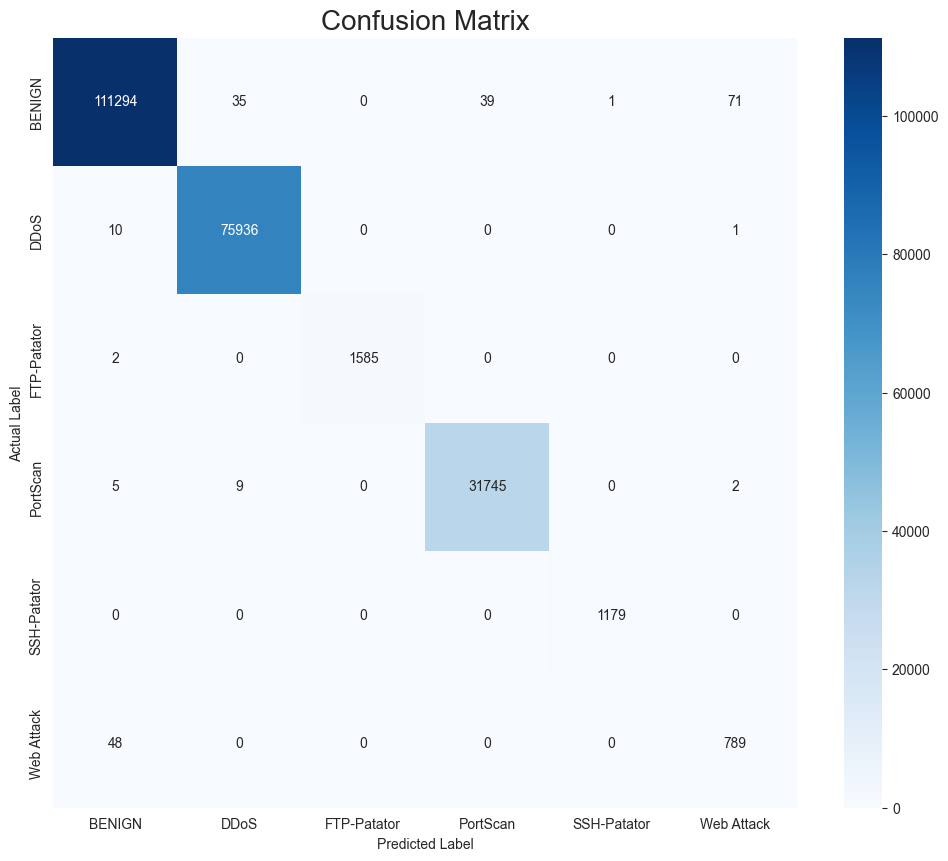


--- Feature Importance Analysis (XGBoost) ---
Top 10 most important features:
                        Feature  Importance
11       Bwd Packet Length Mean        0.19
18       Packet Length Variance        0.15
2             Total Fwd Packets        0.14
17            Packet Length Std        0.10
4   Total Length of Fwd Packets        0.08
9                ACK Flag Count        0.06
0              Destination Port        0.05
3        Total Backward Packets        0.05
6                FIN Flag Count        0.04
5   Total Length of Bwd Packets        0.04

--- Sample Predictions (First 5 Test Cases) ---

Test Case 1:
Features: {'Destination Port': 80.0, 'Flow Duration': 87356.0, 'Total Fwd Packets': 3.0, 'Total Backward Packets': 6.0, 'Total Length of Fwd Packets': 26.0, 'Total Length of Bwd Packets': 11601.0, 'FIN Flag Count': 0.0, 'SYN Flag Count': 0.0, 'RST Flag Count': 0.0, 'ACK Flag Count': 0.0, 'Fwd Packet Length Mean': 8.666666667, 'Bwd Packet Length Mean': 1933.5, 'Flow IAT Me

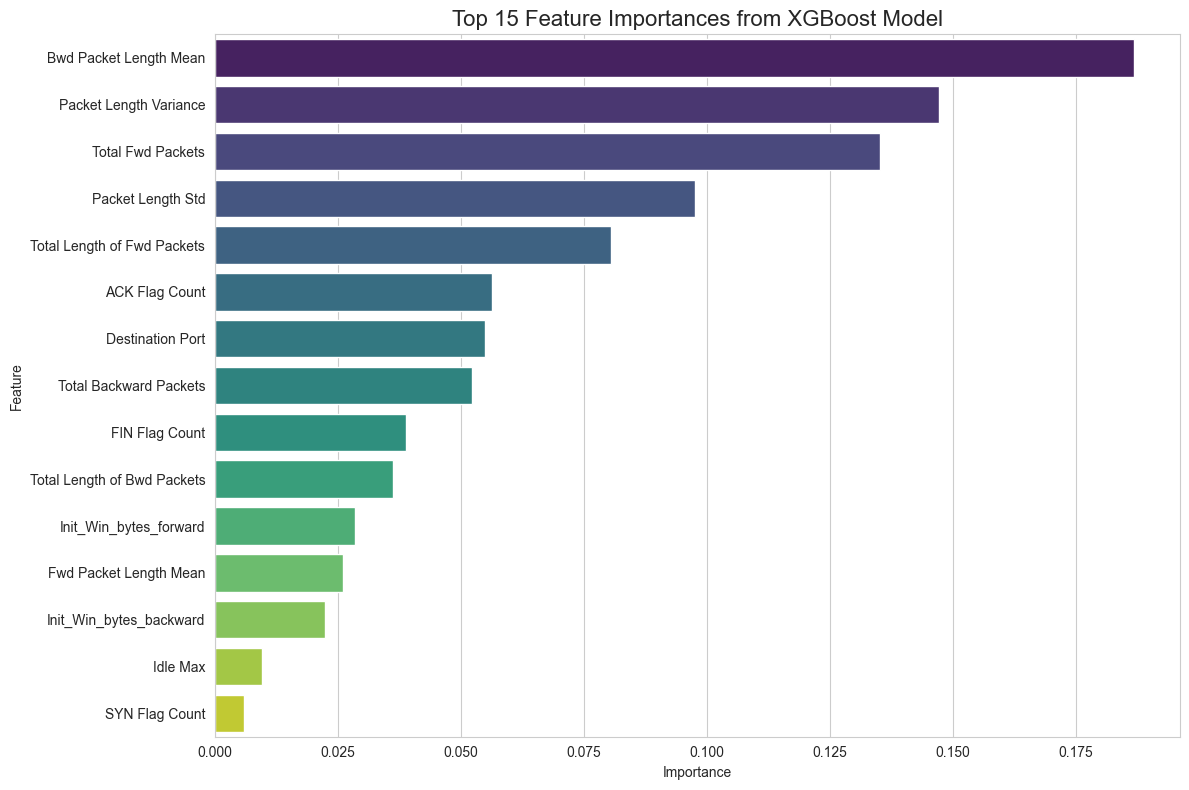

In [22]:
# -*- coding: utf-8 -*-
"""
End-to-End Cybersecurity Detection Pipeline (XGBoost Baseline without SMOTE).
"""

# 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Configure settings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


# 2. FEATURE SELECTION
# =============================================================================
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets',
    'Total Backward Packets', 'Total Length of Fwd Packets',
    'Total Length of Bwd Packets', 'FIN Flag Count', 'SYN Flag Count',
    'RST Flag Count', 'ACK Flag Count',
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Flow IAT Mean',
    'Flow IAT Min', 'Flow IAT Max', 'Init_Win_bytes_forward',
    'Init_Win_bytes_backward',
    'Packet Length Std', 'Packet Length Variance', 'Idle Mean', 'Idle Max',
    'Idle Min', 'Active Mean', 'Active Max', 'Active Min'
]


# 3. DATA LOADING AND PREPROCESSING
# =============================================================================
FILE_PATH = 'balanced_data.txt'
try:
    df = pd.read_csv(FILE_PATH)
    print(f"Dataset '{FILE_PATH}' loaded successfully!")
except FileNotFoundError:
    print(f"Error: '{FILE_PATH}' not found. Using a dummy dataframe.")
    columns = selected_features + ['Label']
    dummy_data = {col: np.random.rand(100) for col in columns}
    dummy_data['Label'] = np.random.choice(['BENIGN', 'DDoS', 'PortScan'], 100)
    df = pd.DataFrame(dummy_data)

print(f"Original shape: {df.shape}")

# Clean data
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(f"Shape after cleaning infinities/NaNs: {df.shape}")

# Feature selection
available_features = [feature for feature in selected_features if feature in df.columns]
df = df[available_features + ['Label']]
print(f"Shape after feature selection: {df.shape}")
print(f"\nUsing {len(available_features)} features for the model.")

# Define Features (X) and Target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. MODEL TRAINING (XGBoost without SMOTE)
# =============================================================================
print("\n--- Training the Detection Model using XGBoost (Baseline without SMOTE) ---")

model = XGBClassifier(
    n_estimators=200,       # Number of trees
    learning_rate=0.1,      # Step size shrinkage
    max_depth=8,            # Tree depth
    subsample=0.8,          # Row sampling
    colsample_bytree=0.8,   # Feature sampling
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Avoids warning for classification
)

model.fit(X_train_scaled, y_train)
print("Model training complete.")


# 5. MODEL EVALUATION
# =============================================================================
print("\n--- Evaluating Model Performance on the Test Set ---")
y_pred = model.predict(X_test_scaled)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix', fontsize=20)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# 6. FEATURE IMPORTANCE
# =============================================================================
print("\n--- Feature Importance Analysis (XGBoost) ---")
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance_df.head(10))

# 7. SAMPLE PREDICTIONS (First 5 Test Cases)
# =============================================================================
print("\n--- Sample Predictions (First 5 Test Cases) ---")

# Select first 5 samples from X_test
sample_X = X_test_scaled[:5]
sample_original_X = X_test.iloc[:5]
sample_y = y_test[:5]

# Predictions & probabilities
predictions = model.predict(sample_X)
probabilities = model.predict_proba(sample_X)

# Decode labels
actual_labels = le.inverse_transform(sample_y)
predicted_labels = le.inverse_transform(predictions)

# Display results
for i in range(5):
    print(f"\nTest Case {i+1}:")
    print(f"Features: {sample_original_X.iloc[i].to_dict()}")
    print(f"Actual Label: {actual_labels[i]}")
    print(f"Predicted Label: {predicted_labels[i]}")

    # Top 2 probabilities
    prob_dict = dict(zip(le.classes_, probabilities[i]))
    top2 = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)[:2]
    print(f"Top 2 Predicted Classes with Probabilities: {top2}")
    print("-" * 60)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from XGBoost Model', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [21]:
import numpy as np

# Select first 5 samples from test set
sample_X = X_test[:5]
sample_y = y_test[:5]

# Get predictions
predictions = model.predict(sample_X)

# Decode predictions and actual labels back to class names
actual_labels = label_encoder.inverse_transform(sample_y)
predicted_labels = label_encoder.inverse_transform(predictions)

# Print results
for i in range(5):
    print(f"Test Case {i+1}:")
    print(f"Features: {sample_X.iloc[i].to_dict()}")
    print(f"Actual Label: {actual_labels[i]}")
    print(f"Predicted Label: {predicted_labels[i]}")
    print("-" * 40)


NameError: name 'label_encoder' is not defined